# Investigate the TMDb Movie Data

## Data Wrangling

In this section, we will firstly load in the data, check for cleanliness, and then trim and clean our dataset for analysis.



### General Properties

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
plt.style.use('seaborn-white')
%matplotlib inline

NOW, import the data and take a brief look at what the data set is like.  

In [6]:
# load the data
filepath = 'tmdb-movies.csv'
df = pd.read_csv(filepath)

# data records, columns, data type, and missing values check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above, we can attain a brief summary of the data structure such as how many records, columns are there, which data each column has and which of them have null values. 

Then let's ouptput a few lines to see how these data actually look like in the data set.

In [7]:
# output the first five rows to see how the data is presented in the data set.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the above, we can see there are 10866 records. There are three data types in total, e.g. ***int***, ***float*** and ***strings***. Some columns like cast, homepage, tagline, production companies have lots of null values. Certain columns, like ‘cast’, ‘genres’ and production companies, contain multiple values separated by pipe ('|') characters. We need to do some tricks on these columns for answering our questions later on.  

Next, let's take a quick view of descriptive statistics summary on the numeric data type in this data set. *See as below*.

In [8]:
# make a brief descriptive statistics summary on the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The summary above tells us some important numeric indicators about the movie, such as,  
- the movie data set records the information from 1960 to 2015.
- the average runtime of a movie is 102 mins but the maximum value is 900 mins which needs to be studied on deeper!
- The mimium values of some columns are 0 such as the `budget`, `revenue`. This is against reality. According to the explaination on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv), *'it was necessary to treat values of zero in the budget field as missing.'*, so we may consider this when we are answering buget/revenue related questions.

### Data Cleaning
In this section, we are going to do some wrangling on the original data set such as dropping some redundant information, groupping, computing etc. for making our exploratory data analysis and answering our questions easily.

#### Drop the irrelevant columns

As some columns do not make sense to answer our questions, we need to delete them from our dataset. Let's decide which columns need to be dropped.

In [9]:
# general information about the data in the table.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Columns like `id`, `imdb_id`, `cast`, `homepage`, `tagline`, `keywords`, `overview` are all irrelevant to our analysis in the project, so we drop them immediately.

In [10]:
# drop the irrelevant columns.
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [11]:
# check the dataset after dropping.
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Drop the missing values
Now let's look at the missing values in the dataset.

In [12]:
# check which columns have missing values and how many are there?
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the result above, we can see that within the columns of `director`, `genres`, `production_companies`, there are a few null values, as they do not take up much proportion, we just choose to delete them.

In [13]:
df.dropna(inplace=True)

In [14]:
# re-check whether the missing values are successfully dropped or not.
df.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [15]:
# reset the index
df.reset_index(inplace=True, drop=True)

#### Alter the data type
Next let's transform the data types of `budget`, `revenue` from ***int*** to ***float***.

In [16]:
# change the data type of budget, revenue to float
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)

Now let's check again the descriptive ststistics summary of the data set after cleaning.

In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9807.000000,9.807000e+03,9.807000e+03,9807.000000,9807.000000,9807.000000,9807.000000,9.807000e+03,9.807000e+03
mean,0.693133,1.612666e+07,4.407345e+07,102.743245,238.609463,5.966361,2000.891200,1.935178e+07,5.684958e+07
std,1.035473,3.216685e+07,1.223983e+08,28.133335,602.052173,0.914297,13.032032,3.562014e+07,1.512176e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231584,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418900,1.457860e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.423044e+05,0.000000e+00
75%,0.774204,1.900000e+07,3.063954e+07,112.000000,172.000000,6.600000,2011.000000,2.442295e+07,4.254888e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


As we can tell from the summary above, the longest runtime of a movie is 877 mins. To confirm this whether it's wrong or not, I searched it on [google](https://www.google.com/search?sxsrf=ALeKk03lXkiNzFw9YwQZ8k338MqIEdPV6A%3A1601458065265&ei=kU90X9_RD4-_0PEP4cCM-A0&q=taken+dreamworks+runtime&oq=taken+dreamworks+runtime&gs_lcp=CgZwc3ktYWIQAzIFCCEQoAEyBQghEKABOgQIIxAnOgQIABAeUP-TB1i1mgdgspsHaABwAHgAgAHYAogBvAmSAQUyLTEuM5gBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab&ved=0ahUKEwif3uiYyJDsAhWPHzQIHWEgA98Q4dUDCA0&uact=5), and found out it is a TV mini series, so let's leave as it is for the moment.

About the situation where budget and revenue equals to 0, as there are as large as (***See as below***), we cannot delete from the data right now as such large volumn of data will affect the liability and precision of other non-budget/revenue indicators' analysis. So we will also keep them temperarily here.

In [18]:
df[(df.budget==0) | (df.revenue==0)]['budget'].count()

5999

In [19]:
df[(df.budget==0) & (df.revenue==0)]['budget'].count()

3832

#### Add auxiliary columns
We noticed that in the `production companies` and `genres`, the data is joined by pipe '|'. For answering the questions ahead better, here we need to add some new auxiliary columns into the dataframe. We take the elemnt before the first '|' in each record as the primary value, e.g. `primary_genre` and `primary_company`


In [20]:
# add the primary_company column
df['company_split'] = df['production_companies'].str.split('|')
df['primary_company'] = df['company_split'].apply(lambda x: x[0])

# add the primary_genre column
df['genre_split'] = df['genres'].str.split('|')
df['primary_genre'] = df['genre_split'].apply(lambda x: x[0])

The data is comparatively clean now and we can begin our exploratory analysis during which we may need to do some more transformation and computing as we are trying to answer our questions.

## Exploratory Data Analysis

### Question 1. How is the number of movie made per year changing with the time?  

First, let's group the data by year and sum up the number of movies made per year.  
We will use the `groupby` method to answer this question. As the dataset after cleaning is all non-null recordes, when we are execute `count` on the group, the result of any column is the same, so here we choose an arbitrary column to calculate.

In [21]:
# extract and calculate the data
num_movies = df.groupby('release_year')['popularity'].count()
num_movies.head()

release_year
1960    32
1961    30
1962    30
1963    34
1964    41
Name: popularity, dtype: int64

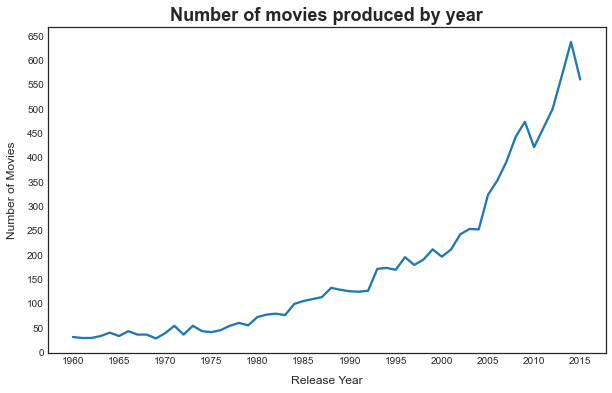

In [22]:
# visualize the data
x_tick = [i for i in range(1960,2016,5)]
y_tick = [i for i in range(0, 700, 50)]
num_movies.plot(figsize=(10,6), xticks=x_tick, yticks=y_tick, linewidth=2.3)
plt.xlabel('Release Year', fontsize=12, labelpad=10)
plt.ylabel('Number of Movies', fontsize=12, labelpad=10)
plt.title('Number of movies produced by year', fontsize=18, fontweight='semibold');

From the line plot above, we can see that the number of movies produced in a year is increasing as years went by, especially after 2000, it was rising very sharply, hitting the peak of 638 in 2014. Up unitl 2015, the number made in one year worldwide is almost 14 times as large as that back in 1960.  

### Question 2.  Who are the TOP 5 companies who made the most movies throughout the years?

Before answering this question, we need to add two new columns--'company_split', 'primary_company'. 'company_split' columns is an auxiliary column to split the data in 'production_companies' by '|'; we take the first element or company as the 'primary_company' who mainly produced the movie.

In [23]:
# aggregate the number of movies produced in history by primary company name
df_numByCo = df.groupby('primary_company')['release_year'].count().sort_values(ascending=False)
df_numByCo

primary_company
Universal Pictures                             460
Paramount Pictures                             426
Columbia Pictures                              271
Twentieth Century Fox Film Corporation         242
Walt Disney Pictures                           213
                                              ... 
Limelight Productions                            1
Limelight International Media Entertainment      1
Limbridge                                        1
Chessman Park Productions                        1
í”„ë¡œë•ì…˜M                                     1
Name: release_year, Length: 3041, dtype: int64

In [24]:
# extract the top5 most productive companies from above
top5_numByCo = df_numByCo[:5]
top5_numByCo

primary_company
Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
Name: release_year, dtype: int64

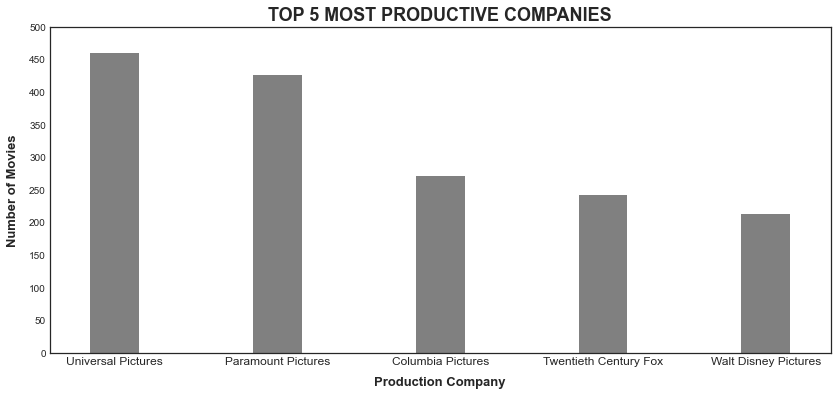

In [25]:
# the name of 'Twentieth Century Fox Film Corporation' is long which makes the present on the axis bad, so I shorten it.
new_tickLabel = ['Twentieth Century Fox' if i =='Twentieth Century Fox Film Corporation' else i for i in top5_numByCo.index]

# define an appropiate range for y axis ticks
y_tick = [i for i in range(0, 550, 50)]

# draw a bar chart for visualizing the question
top5_numByCo.plot(kind='bar', width=0.3, grid=False, figsize=(14,6), color='grey')

# adjust the graph to make it look user-friendly
plt.title('TOP 5 MOST PRODUCTIVE COMPANIES', fontsize=18, fontweight='semibold')
plt.xlabel('Production Company', fontsize=13, labelpad=10, fontweight='semibold')
plt.ylabel('Number of Movies', fontsize=13, labelpad=10, fontweight='semibold')
plt.xticks(np.arange(5), new_tickLabel, rotation=0,  fontsize=12);
plt.yticks(y_tick, fontsize=10);

From the bar chart above, we can see the top 5 companies who made the most movies in history.

Next, we can even take a look at how the number of movies made in each company varied with time.

In [26]:
# construct the dataframe for visualization.
top5_numByCo_names = list(top5_numByCo.index)
df_top5_numByCo = df[df['primary_company'].isin(top5_numByCo_names)]
Stat_top5_numByCo = df_top5_numByCo.groupby(['primary_company','release_year'])['original_title'].count()
Stat_top5_numByCo.name = 'count'

# reconstructure the DataFrame for visualization purpose
Stat_top5_numByCo1 = Stat_top5_numByCo.unstack(level=0)
Stat_top5_numByCo1.head()

primary_company,Columbia Pictures,Paramount Pictures,Twentieth Century Fox Film Corporation,Universal Pictures,Walt Disney Pictures
release_year,,,,,
1960,1.0,2.0,4.0,NaN,NaN
1961,1.0,2.0,3.0,NaN,1.0
1962,NaN,2.0,1.0,2.0,NaN
1963,NaN,3.0,1.0,1.0,NaN
1964,NaN,2.0,2.0,3.0,NaN


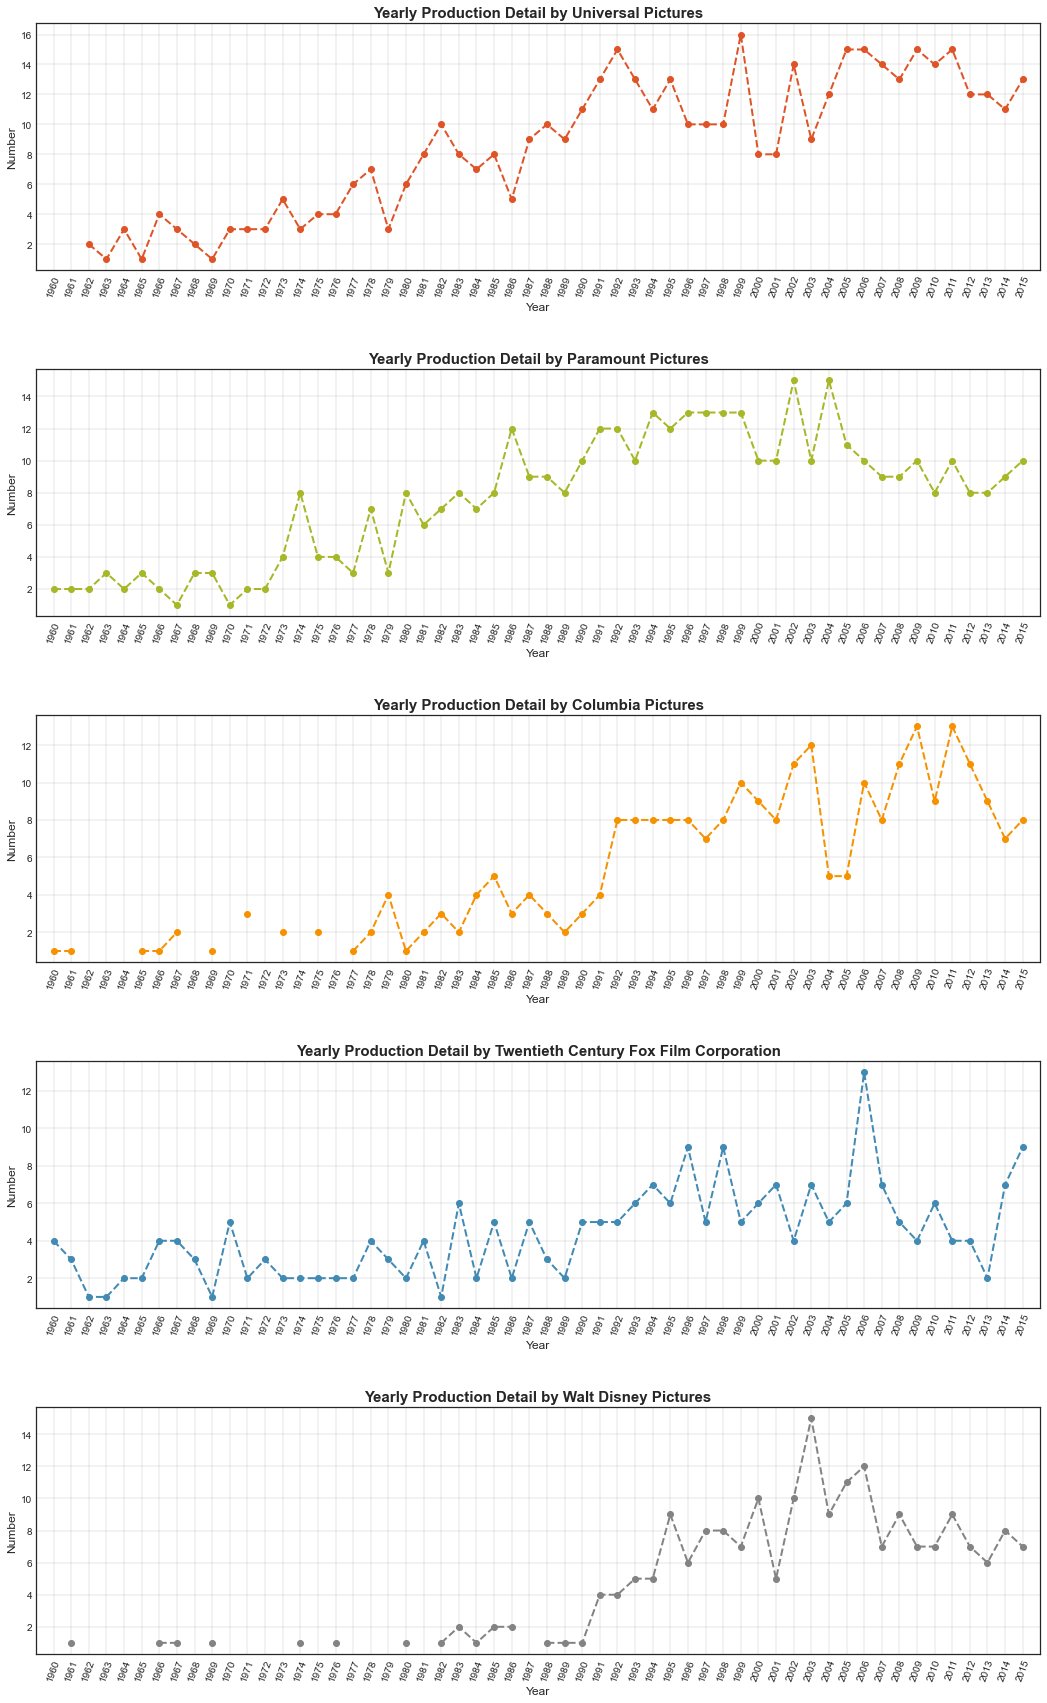

In [27]:
# visualize the movie number variation by each year among the 5 most prodcutive companies
colour_pa = ['#DF5427','#A6B827','#F69200','#418AB3', '#838383']
for i, j, k in zip(np.arange(511, 516), top5_numByCo_names, colour_pa):
    plt.subplot(i)
    Stat_top5_numByCo1[j].plot(linestyle='--', linewidth=2, marker='o', figsize=(18,30), color=k)
    plt.title("Yearly Production Detail by {}".format(j), fontweight='semibold', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.grid(color='grey', linewidth=0.4, alpha=0.5)
    plt.xticks(np.arange(1960, 2016), rotation=70)
    plt.xlim(1959,2016)
    subplots_adjust(hspace=0.4)

From all the pictures above, we can find that after 1990, the number of movies made each year in all the five companies were jumping onto a higher level.

### Question 3.  What are the 5 movies which made the most revenues in history?

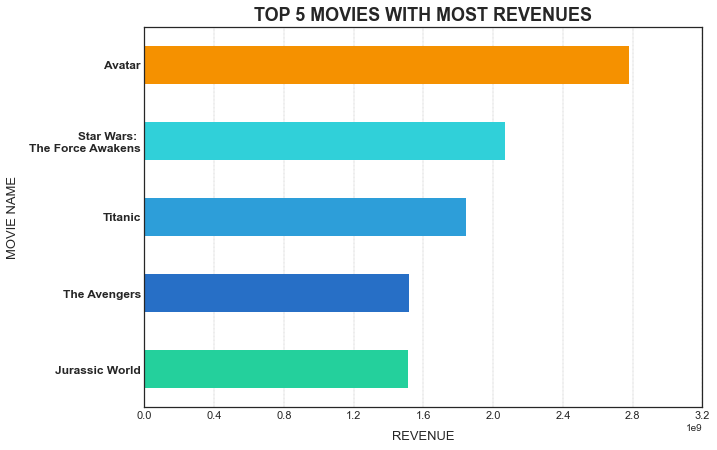

In [28]:
# create the DataFrame fot visualizing the 5 movies who made the most revenues of all time
top5_rev = df.sort_values('revenue', ascending=False)[['original_title','revenue']][:5]
top5_rev.reset_index(inplace=True, drop=True)

# create the figure and make it more readible
colour = ['#24D09C','#276FC6','#2D9ED9','#30D0D9','#F59100']
new_tickLabel1 = ['Star Wars: \nThe Force Awakens' if i =='Star Wars: The Force Awakens' else i for i in top5_rev.original_title[::-1]]
top5_rev.sort_values('revenue').plot(y='revenue', x='original_title', width=0.5, kind='barh', color = colour, figsize=(10,7), legend=None)
plt.title('TOP 5 MOVIES WITH MOST REVENUES', fontsize=18, fontweight='semibold')
plt.ylabel('MOVIE NAME', fontsize=13, labelpad=10)
plt.xlabel('REVENUE', fontsize=13, labelpad=10)
plt.yticks(np.arange(5), new_tickLabel1, rotation=0, fontsize=12, fontweight='semibold')
plt.xticks(np.arange(0,3.5*10**9,0.4*10**9), fontsize=11)
plt.grid(axis='x', color='k', linewidth=0.3, linestyle=':', alpha=0.9);

From the horizontal bar chart above, we can see that the 5 movies with the most revenue in history are:  
1. Avatar
2. Star Wars: The Force Awakens
3. Titanic
4. The Avengers
5. Jurassic World

### Question 4. What are the most popular movie types  companies would like to make?

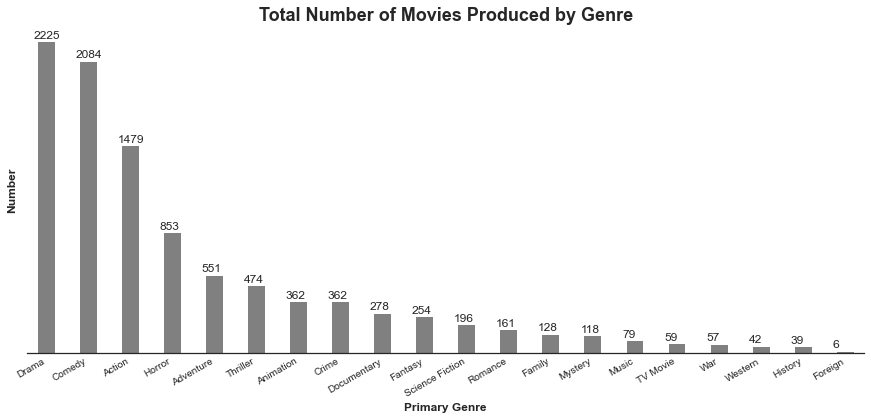

In [29]:
# aggregate the data by movie genre and sum up the numbers in each genre respectively.
df_numByType = df.groupby('primary_genre')['original_title'].count().sort_values(ascending=False)

# draw the graph
df_numByType.plot(kind='bar', width=0.4, color='grey', grid=False, figsize=(15,6))
plt.xlabel('Primary Genre', fontsize=12, fontweight='semibold')
plt.ylabel('Number', fontsize=12, fontweight='semibold', labelpad=10)
plt.title('Total Number of Movies Produced by Genre', fontsize=18, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.yticks([])

# get rid of the surrounding axis frames
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# add the annotation on top of the bar chart
total_type = len(df_numByType.index)
for i, dt in zip(np.arange(total_type), df_numByType):
    plt.text(x=i-0.3, y=dt+30, s=str(dt), fontsize=12)


From the bar chart above, we can see that three genres, namely ***drama***, ***comedy***, ***action***, is overwhelmingly popular, based on the their numbers already produced throughout the years.   

Next we'll see how the production of these 3 genres, varied with the time.

In [30]:
# extract the 3 most popular genres
top3_genre_names = list(df_numByType.index)[:3]
top3_genre_names

# extract the 5 most popular genres
top5_genre_names = list(df_numByType.index)[:5]
top5_genre_names

['Drama', 'Comedy', 'Action', 'Horror', 'Adventure']

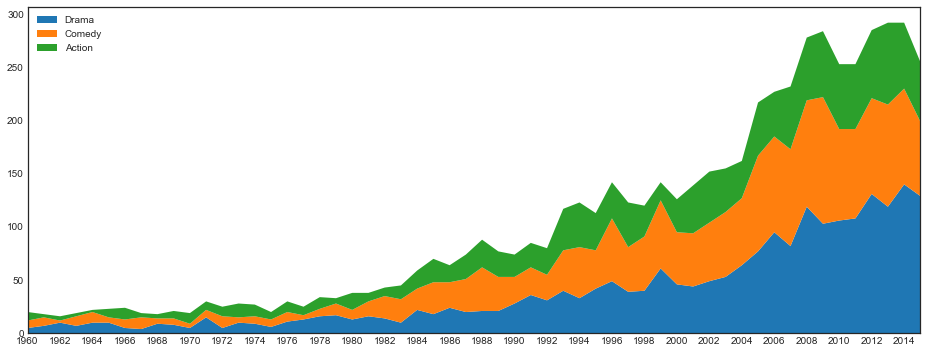

In [31]:
# create the top 3 genres series
years = np.arange(1960, 2016)
drama_srs = df[df['primary_genre']=='Drama'].groupby('release_year')['original_title'].count().values
comedy_srs = df[df['primary_genre']=='Comedy'].groupby('release_year')['original_title'].count().values
action_srs = df[df['primary_genre']=='Action'].groupby('release_year')['original_title'].count().values

labels = ['Drama', 'Comedy', 'Action']

# make the stackplot
plt.figure(figsize=(16,6))
plt.stackplot(years, drama_srs, comedy_srs, action_srs, labels=labels)

plt.xticks(years[::2])

plt.xlim(1960,2015)
plt.legend(loc='upper left');

From the area stacked graph above, we can see that the number of movies in each movie genre was increasing year by year, with ***drama*** covering the largest proportion and ***action*** relatively smaller.

In [32]:
# get the series for the 5 most prodcutive companies
top5_CoByGenre_list = ["srs_{}".format(i) for i in top5_numByCo_names ]

# use an empty list to store the data from the top 5 companies' production detail by genres
srs_list = []
for i, j in zip(top5_CoByGenre_list, top5_numByCo_names):
    i = df[df['primary_company']==j].groupby('primary_genre')['original_title'].count()
    srs_list.append(i)

# concatenate these data into a new DataFrame
new_df = pd.concat(srs_list, axis=1, sort=False)

# rename the columns of the new DataFrame
new_df.columns = top5_numByCo_names

# transpose the DataFrame for the sake of visualization later on
tmp = new_df.T[top5_genre_names]

# Check the new data
tmp

primary_genre,Drama,Comedy,Action,Horror,Adventure
Universal Pictures,76.0,126.0,98.0,36.0,39.0
Paramount Pictures,89.0,117.0,76.0,21.0,25.0
Columbia Pictures,60.0,71.0,60.0,5.0,10.0
Twentieth Century Fox Film Corporation,38.0,61.0,61.0,9.0,22.0
Walt Disney Pictures,12.0,41.0,20.0,NaN,41.0


Now let's explore more a little bit.  
I am wondering among the top 5 most productive companies, how the 5 most preferred movie genre varies each other. Here are the steps.  
1. extract the 5 most preferred movie genre. We can refer to the result of the previous question.
2. extract the 5 most productive companies.
3. Based on each company, create a stacked bar chart consisting the 5 genres from step 1.

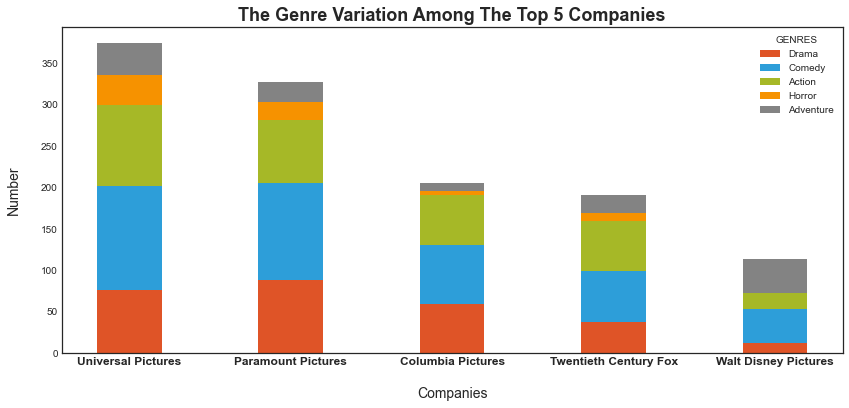

In [33]:
# draw the stacked bar chart
x = np.arange(len(top5_numByCo_names))
plt.figure(figsize=(14,6))
bar_width = 0.4
color_pa = ['#DF5427','#2D9ED9','#A6B827','#F69200','#838383']
plt.bar(x, tmp['Drama'], width = bar_width, label='Drama', color=color_pa[0])

for i, j, c in zip(np.arange(1, len(list(tmp.columns)[1:5])+1), list(tmp.columns)[1:5], color_pa[1:]):    
    plt.bar(x, 
            tmp["{}".format(j)], 
            bottom=tmp[[k for k in list(tmp.columns)[:i]]].sum(axis=1), 
            width = bar_width, 
            label="{}".format(j), color=c)
    
# visualization customization    
plt.xticks(x, new_tickLabel, fontweight='semibold', fontsize=12)
plt.legend(title='GENRES', loc='upper right')
plt.title('the genre variation among the top 5 companies'.title(), fontsize=18, fontweight='semibold')
plt.xlabel('Companies', fontsize=14, labelpad=20)
plt.ylabel('Number', fontsize=14, labelpad=20);

### Question 5.  Is there any relationship between REVENUE and VOTE_COUNT of a movie?

To answer this question, let's extract the `revenue` and `vite_count` columns to make a new DataFrame. And then visualize it.

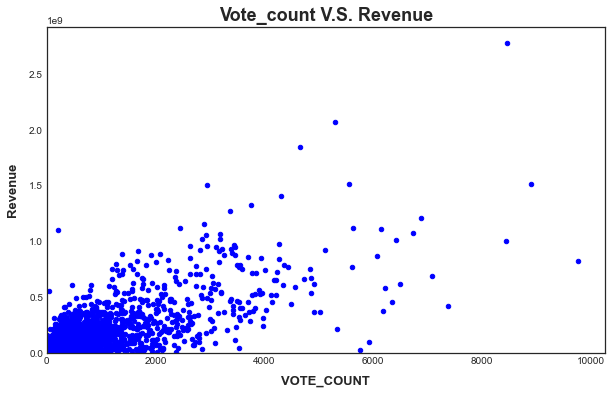

In [34]:
# Extract the data
df_Rev_Vote = df[['revenue','vote_count']]

# Visualize the relationship between them.
df_Rev_Vote.plot(x='vote_count', y='revenue', kind='scatter', figsize=(10,6), color='blue')
plt.title('Vote_count V.S. Revenue', fontsize=18, fontweight='semibold')
plt.xlim(0,)
plt.ylim(0,)
plt.ylabel('Revenue', fontsize=13, labelpad=10, fontweight='semibold')
plt.xlabel('VOTE_COUNT', fontsize=13, labelpad=10, fontweight='semibold');

From the picture above, we can see that there may exist a positive relationship between revenue and its vote count, although the relationship is not that much strong.

### Question 6.  By the scale of top 10 most productive directors and top 10 directors who made the most revenues, are (is) there any director(s) who perform quite well both in productivity and revenue?

To answer the question, we need to group the data by `director` and sum up their records and then sort. 

In [35]:
# top 10 directors who made the most movies
df_top10_dir_num = df.groupby('director').count()['popularity'].sort_values(ascending=False)[:10]

# rename the series
df_top10_dir_num.name = 'num_movies_directed'
df_top10_dir_num

director
Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: num_movies_directed, dtype: int64

In [36]:
type(df_top10_dir_num)

pandas.core.series.Series

In [37]:
# top 10 directors who made the most revenues
df_top10_dir_rev = df.groupby('director')['revenue'].sum().sort_values(ascending=False)[:10]
df_top10_dir_rev

director
Steven Spielberg     9.018564e+09
Peter Jackson        6.523245e+09
James Cameron        5.841895e+09
Michael Bay          4.917208e+09
Christopher Nolan    4.167549e+09
David Yates          4.154296e+09
Robert Zemeckis      3.869691e+09
Chris Columbus       3.851492e+09
Tim Burton           3.665415e+09
Ridley Scott         3.649996e+09
Name: revenue, dtype: float64

Find out who are the directors that are among the ones who made **the most movies** of all time and those who made **the most revenues**.

In [38]:
dir_mrg = pd.merge(left=df_top10_dir_num.to_frame(), right=df_top10_dir_rev.to_frame(), on='director')
dir_mrg

,num_movies_directed,revenue
director,,
Steven Spielberg,29,9.018564e+09
Ridley Scott,23,3.649996e+09


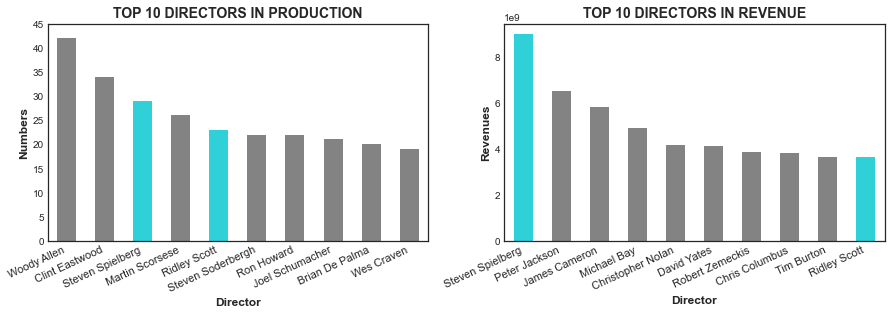

In [39]:
# visualize the data for the 10 most productive directors in history
plt.subplot(121)
color_list = ['#30D0D9' if i in list(dir_mrg.index) else '#838383' for i in df_top10_dir_num.index]
df_top10_dir_num.plot(x='director', y='num_movies_directed', color = color_list, kind='bar', yticks=np.arange(0,50,5))
plt.xlabel('Director', fontsize=12, fontweight='semibold')
plt.ylabel('Numbers', fontsize=12, fontweight='semibold')
plt.xticks(rotation=25, ha='right', fontsize=11)
plt.title('TOP 10 DIRECTORS IN PRODUCTION', fontsize=14, fontweight='semibold')

# visualize the data for the 10 directors who amde the most revenues in history
plt.subplot(122)
color_list = ['#30D0D9' if i in list(dir_mrg.index) else '#838383' for i in df_top10_dir_rev.index]
df_top10_dir_rev.plot(x='director', color=color_list, kind='bar',  figsize=(15,4))
plt.xlabel('Director', fontsize=12, fontweight='semibold')
plt.ylabel('Revenues', fontsize=12, fontweight='semibold')
plt.xticks(rotation=25, ha='right', fontsize=11)
plt.title('TOP 10 DIRECTORS IN REVENUE', fontsize=14, fontweight='semibold');

From the top 10 bar chart above, we can see that there are only **two directors** ,e.g. ***Steven Spielberg*** and ***Ridley Scott***, who were both in the top 10 by number of movies produced and the top 10 by making revenues.  

Next, let's dive in deeper to exlpore more information.

First, let's see how many movies were made in each genre by Steven Spielberg?

In [40]:
df_spielberg = df[df['director']=='Steven Spielberg']
df_spielberg.groupby('primary_genre')['original_title'].count().sort_values(ascending=False)

primary_genre
Drama              10
Adventure           9
Action              3
Horror              2
Science Fiction     2
Comedy              1
Fantasy             1
Thriller            1
Name: original_title, dtype: int64

From the above we can see most of his movies were made in two genres -- drama and adventure. So how did the revenue in these two genres distribute?

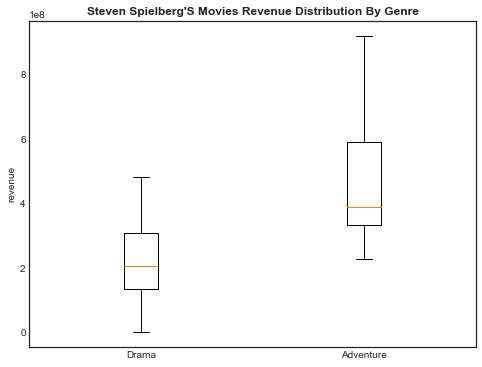

In [41]:
# request the data
SS_drm_rev = df[(df['director']=='Steven Spielberg') & (df['primary_genre']=='Drama')]['revenue']
SS_adv_rev = df[(df['director']=='Steven Spielberg') & (df['primary_genre']=='Adventure')]['revenue']

# make a boxplot
plt.figure(figsize=(8,6))
plt.boxplot([SS_drm_rev, SS_adv_rev])

# configuration of graph
plt.xticks([1,2],['Drama', 'Adventure'])
plt.title("Steven Spielberg's Movies revenue distribution by genre".title(), fontweight='semibold')
plt.ylabel('revenue');

From the boxplot above, the revenue of adventure is obviously better than drama; Also the distribution of drama is more like a normal distribution while adventure more of right skewed.  

Then, let's check how these two genres vote count distributed.

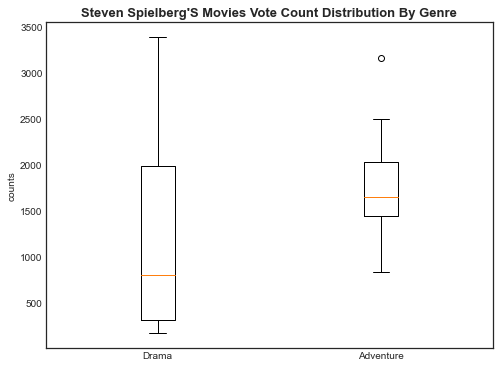

In [42]:
# Obtain the data for vote count
SS_drm_vc = df[(df['director']=='Steven Spielberg') & (df['primary_genre']=='Drama')]['vote_count']
SS_adv_vc = df[(df['director']=='Steven Spielberg') & (df['primary_genre']=='Adventure')]['vote_count']


# make a boxplot
plt.figure(figsize=(8,6))
plt.boxplot([SS_drm_vc, SS_adv_vc])

# configuration of graph
plt.xticks([1,2],['Drama', 'Adventure'])
plt.title("Steven Spielberg's Movies vote count distribution by genre".title(), fontweight='semibold', fontsize=13)
plt.ylabel('counts');

From the figure above, in Steven Spielbeberg's two most common movie genres, the vote counts for adventure movie seem more concentrated, plus its average vote count is larger than that of drama.  

As Peter Jackson is the second director who made the most revenue in history, right just behind Steven Spielberg, so let's make a little bit more comparison between the two.

In [43]:
# Explore Peter Jackson's movie genre information.
df_peterJ = df[df['director']=='Peter Jackson']
df_peterJ.groupby('primary_genre')['original_title'].count().sort_values(ascending=False)

primary_genre
Adventure    7
Horror       2
Action       1
Comedy       1
Drama        1
Fantasy      1
Name: original_title, dtype: int64

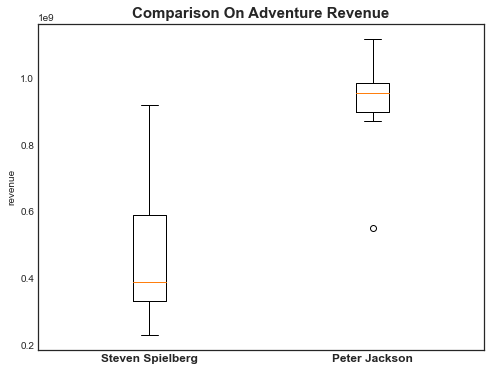

In [44]:
# extract PJ's revenue data
PJ_adv_rev = df[(df['director']=='Peter Jackson') & (df['primary_genre']=='Adventure')]['revenue']

# Compare the adventure films revenue between Steven Spielberg and Peter Jackson
plt.figure(figsize=(8,6))
plt.boxplot([SS_adv_rev, PJ_adv_rev])

# configuration of graph
plt.xticks([1,2],['Steven Spielberg', 'Peter Jackson'])
plt.title("comparison on adventure revenue".title(), fontweight='semibold', fontsize=15)
plt.xticks(fontsize=12, fontweight='semibold')
plt.ylabel('revenue');

From the boxplot above, we can tell that most of Peter Jackson's adventurous movies were bringing in much more revenues than Steven Spielberg, for example, the medium value of Peter J's is almost 2.5 times as large as Steven S's.. Moreover, the general distribution of the former one is also more concentrated or in a narrower range.

### Question 7.  Do the release date of movies have a preference to the months of a year?

Let's explore whether movie companies prefer to release their works in certain months of a year or not?  
To answer this question, we need to get the month num from `release_date` column, then group by that month number and sum up the records.

In [45]:
# extract the month digit from release_date
df['release_month'] = df.release_date.str.split('/').apply(lambda x: x[0])
df['release_month'] = df['release_month'].astype(int)

# group by month and sum it up.
release_distribution = df.groupby('release_month')['popularity'].count()

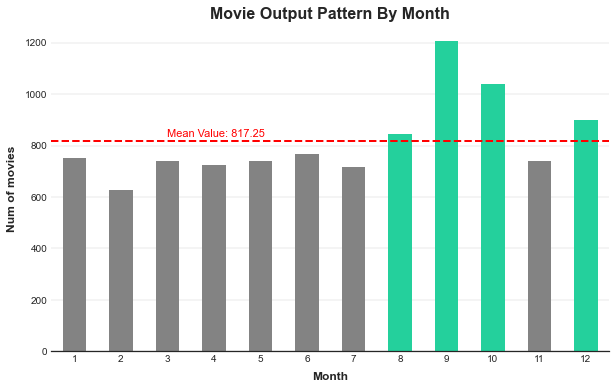

In [46]:
# For a reference line in graph, calculate the mean of month production in history. 
mon_avg = release_distribution.mean()

# color code for emphasizing those larger than the mean, and the others with a different color
colors = ['#24D09C' if release_distribution.loc[i]>mon_avg else '#838383' for i in release_distribution.index ]

# draw the graph
release_distribution.plot(kind='bar', color=colors, figsize=(10,6))

# graph properties purification
plt.xticks(rotation=0)
plt.xlabel('Month', fontsize=12, fontweight='semibold', labelpad=8)
plt.ylabel('Num of movies', fontsize=12, fontweight='semibold', labelpad=8)
plt.title('movie output pattern by month'.title(), fontsize=16, fontweight='bold')
plt.axhline(mon_avg, color='red', linestyle='--', linewidth=2)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(color='grey', linewidth=0.2, alpha=0.8, axis='y')
plt.text(2, 835, 'Mean Value: {}'.format(mon_avg), fontsize=11, fontweight='medium', color='r');

From the bar chart above, it shows clearly that movie companies prefer to release their works in the second half of a year, especiallly in September, October and December.

## Conclusions

1. How is the number of movie made per year changing with the time?  
The number of movies produced in a year is increasing as years went by, especially after 2000, it was rising very sharply, hitting the peak of 638 in 2014. Up unitl 2015, the number made in one year worldwide is almost 14 times as large as that back in 1960.  
2. Who are the TOP 5 companies who made the most movies throughout the years?  
    - Universal Pictures
    - Paramount Pictures
    - Columbia Pictures
    - Twentieth Century Fox Film Corporation
    - Walt Disney Pictures
3. What are the 5 movies which made the most revenues in history?    
    - Avatar
    - Star Wars: The Force Awakens
    - Titanic
    - The Avengers
    - Jurassic World
4. What are the most popular movie types companies would like to make?  
Three genres, namely ***drama***, ***comedy***, ***action***, is overwhelmingly popular, based on the their numbers already produced throughout the years.
5. Is there any relationship between REVENUE and VOTE_COUNT of a movie?  
There may exist a positive relationship between revenue and its vote count, although the relationship is not that much strong.
6. By the scale of top 10 most productive directors and top 10 directors who made the most revenues, are (is) there any director(s) who perform quite well both in productivity and revenue?  
There are two directors ,e.g. Steven Spielberg and Ridley Scott, who were both in the top 10 by number of movies produced and the top 10 by making revenues.
7. Do the release date of movies have a preference to the months of a year?  
Movie companies prefer to release their works in the second half of a year, especiallly in September, October and December.